## Rigid Body Motion and 3D Graph Visualization

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

The functions bellow are just to help ploting and visualization. They are definitions of functions that are going to be used latter.

In [2]:
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)

    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis


### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)


## Base vectors representation
#### Defining the 3D vectors e1, e2 and e3, and the origin (0,0,0) in homogeneous coordinates.


Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
Camera: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
World: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Text(0.5, 0.92, 'Camera and World Reference Frames')

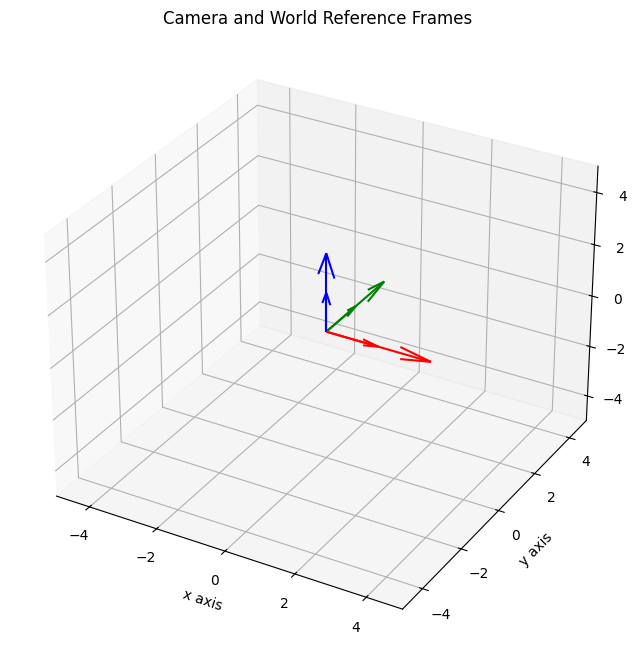

In [3]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
origin =np.array([[0],[0],[0],[1]])

print ('Origin: \n',origin)

# You can also consider the camera as an object composed by its base and origin
# Then you can transform such object whenever you want to rotate or translate the camera
cam  = np.hstack([base,origin])


# We are also going to create a reference frame to the world
# Until this moment both reference frames are just the same
world = np.hstack([base,origin])

print ('Camera: \n', cam)
print ('World: \n', world)

# Ploting the world reference frame and the camera frame

axis = set_plot(lim=[-5,5])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis = draw_arrows(cam[:,-1],cam[:,0:3],axis,1.5)
axis.set_title("Camera and World Reference Frames")

## Defining Rigid Body Transformations as functions



In [4]:
# Translation

def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1]=dx
    T[1,-1]=dy
    T[2,-1]=dz
    return T


# Rotation
# From the first example and from the definition of the rotations around each axis create the other
# rotaiton functions

from math import pi,cos,sin

def z_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    angle = angle*pi/180
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix

## Let's move a 3D point and a 3D vector

Initial point: 
 [-4  8  3  1]
Translation Matrix: 
 [[ 1.  0.  0.  6.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1.  5.]
 [ 0.  0.  0.  1.]]
Translated point: 
 [2. 5. 8. 1.]


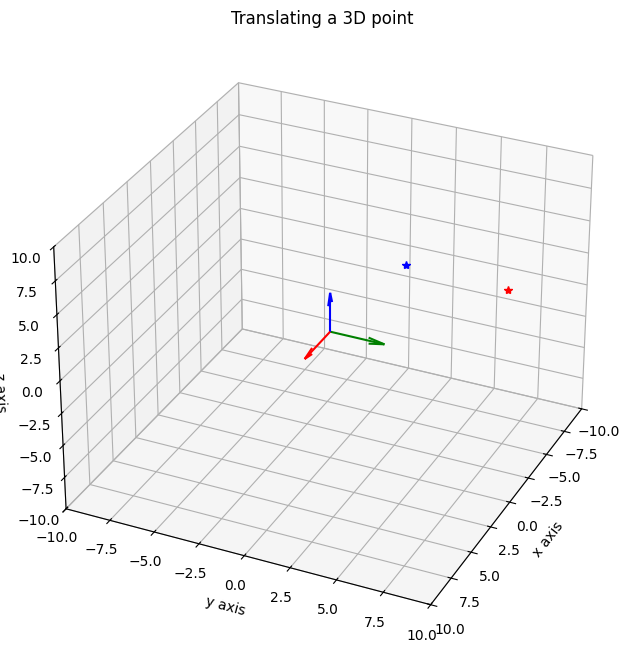

In [5]:
# Create a 3D point with the coordinates: (-4, 8, 3, 1)
# Print the point so you can compare later

p3Di = np.array([-4, 8, 3, 1])
print('Initial point: \n', p3Di)

# Create a Translation Matrix with dx= 6, dy= -3, dz= 5)
# Print the matrix so you can see how it is defined

T = move(6,-3,5)
print('Translation Matrix: \n', T)

# Translate the point and print the result to compare with the initial point

p3Dt = np.dot(T,p3Di)
print('Translated point: \n', p3Dt)

# Let's plot the initial and translated point in the world frame
axis = set_plot(lim=[-10,10])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis.plot3D(p3Di[0],p3Di[1],p3Di[2],'*r')
axis.plot3D(p3Dt[0],p3Dt[1],p3Dt[2],'*b')
axis.set_title('Translating a 3D point')
axis.view_init(elev=30, azim=25)

v
 [-4  8  3  0]
Initial vector: 
 [-4  8  3  0]
Translation Matrix: 
 [[ 1.  0.  0.  6.]
 [ 0.  1.  0. -3.]
 [ 0.  0.  1.  5.]
 [ 0.  0.  0.  1.]]
Translated point: 
 [-4.  8.  3.  0.]


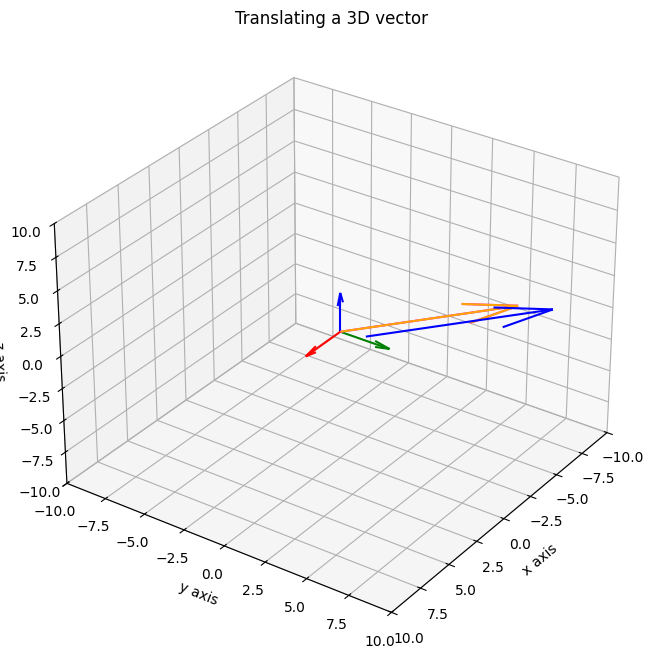

In [6]:
# Create a 3D pointvector with the coordinates: (-4, 8, 3, 0)
# Print the point so you can compare later

v3Di = np.array([-4, 8, 3, 0])

# Another way to calculate the same vector
p1 = np.array([1,1,1,1])
p2 = np.array([5,-7,-2,1])
v = p1-p2
print('v\n',v)

print('Initial vector: \n', v3Di)

# Create a Translation Matrix with dx= 6, dy= -3, dz= 5)
# Print the matrix so you can see how it is defined

T = move(6,-3,5)
print('Translation Matrix: \n', T)

# Translate the vector and print the result to compare with the initial vector

v3Dt = np.dot(T,v3Di)
print('Translated point: \n', v3Dt)


# Let's plot the initial and translated vector in the world frame
axis = set_plot(lim=[-10,10])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis.quiver(0,0,0,v3Di[0],v3Di[1],v3Di[2],color='magenta',pivot='tail',  length=1)
axis.quiver(0,0,0,v3Dt[0],v3Dt[1],v3Dt[2],color='orange',pivot='tail',  length=1)
axis.quiver(5,5,5,v[0],v[1],v[2],color='blue',pivot='tail',  length=1)
axis.set_title('Translating a 3D vector')
axis.view_init(elev=30, azim=35)

### Attention: Did the vector change?


## Let's rotate a 3D point and a 3D vector

Initial point: 
 [4 4 0 1]
Rotation Matrix: 
 [[ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
Rotated point: 
 [0. 4. 4. 1.]


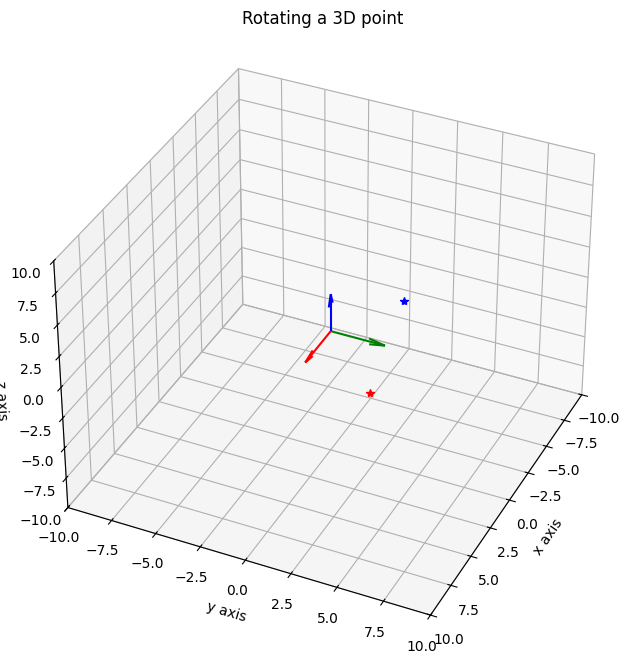

In [7]:
# Create a 3D point with the coordinates: (4, 4, 0, 1)
# Print the point so you can compare later

p3Di = np.array([4, 4, 0, 1])
print('Initial point: \n', p3Di)

# Create a Rotation Matrix around the Y-axis of -90 degrees
# Print the matrix so you can see how it is defined

Ry = y_rotation(-90)
print('Rotation Matrix: \n', Ry)

# Rotate the point and print the result to compare with the initial point

p3Dr = np.dot(Ry,p3Di)
print('Rotated point: \n', p3Dr)

# Let's plot the initial and translated point in the world frame
axis = set_plot(lim=[-10,10])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis.plot(p3Di[0],p3Di[1],p3Di[2],'*r')
axis.plot(p3Dr[0],p3Dr[1],p3Dr[2],'*b')
axis.set_title('Rotating a 3D point')
axis.view_init(elev=35, azim=25)

Initial vector: 
 [4 4 0 0]
Rotation Matrix: 
 [[ 0.  0. -1.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]
Rotated vector: 
 [0. 4. 4. 0.]


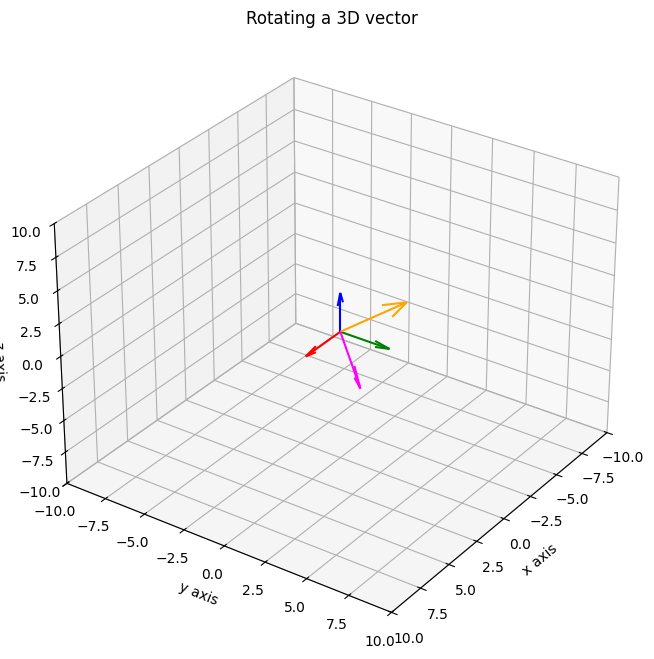

In [8]:
# Create a 3D vector with the coordinates: (4, 4, 0, 0)
# Print the point so you can compare later

v3Di = np.array([4, 4, 0, 0])
print('Initial vector: \n', v3Di)

# Create a Rotation Matrix around the Y-axis of -90 degrees
# Print the matrix so you can see how it is defined

Ry = y_rotation(-90)
print('Rotation Matrix: \n', Ry)

# Rotate the vector and print the result to compare with the initial vector

v3Dr = np.dot(Ry,v3Di)
print('Rotated vector: \n', v3Dr)


# Let's plot the initial and translated vector in the world frame
axis = set_plot(lim=[-10,10])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis.quiver(0,0,0,v3Di[0],v3Di[1],v3Di[2],color='magenta',pivot='tail',  length=1)
axis.quiver(0,0,0,v3Dr[0],v3Dr[1],v3Dr[2],color='orange',pivot='tail',  length=1)
axis.set_title('Rotating a 3D vector')
axis.view_init(elev=30, azim=35)

## Now let's move the camera as an object


Rx:
 [[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  1.]] 

Translation:
 [[1. 0. 0. 3.]
 [0. 1. 0. 3.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]] 



Text(0.5, 0.92, 'Camera and World Reference Frames')

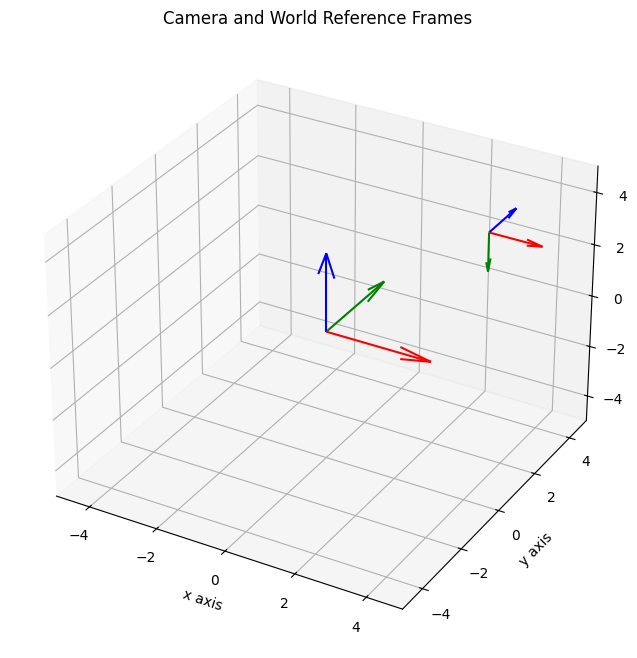

In [9]:
# Define rotation
Rx = x_rotation(-90)
print('Rx:\n',Rx,'\n')

# Define translation
T = move (3,3,3)
print('Translation:\n', T,'\n')

# Combining the transforamtions
M = T@Rx

# or M = np.dot(T,Rx)

# Transforming the camera

new_cam = M@cam

# Ploting the world reference frame and the camera frame

axis = set_plot(lim=[-5,5])
axis = draw_arrows(world[:,-1],world[:,0:3],axis,3)
axis = draw_arrows(new_cam[:,-1],new_cam[:,0:3],axis,1.5)
axis.set_title("Camera and World Reference Frames")

## Let's create and plot an object

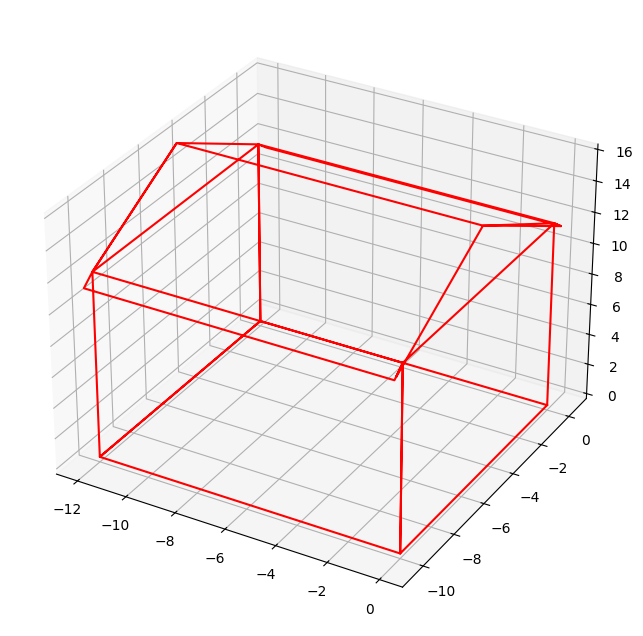

In [10]:
# Create a house
house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

# We have to transpose the object matrix so we can have the points arranged as:
#  house = [ x1, x2, ... ,xn
#            y1, y2, ... ,yn
#            z1, z2, ... ,zn]

house = house.T
# or house = np.transpose(house)

# Representing the object in homogeneous coordinates
# Create row of ones
num_columns = np.size(house,1)
ones_line = np.ones(num_columns)

# Add to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, ones_line])

# Plotting the house
figure = plt.figure(figsize=(8,8))
ax0 = plt.axes(projection='3d')
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')

## Transforming the house

Translation Matrix: 
 [[ 1.  0.  0. 20.]
 [ 0.  1.  0.  4.]
 [ 0.  0.  1. 30.]
 [ 0.  0.  0.  1.]]
Rotation Matrix: 
 [[ 0.707 -0.707  0.     0.   ]
 [ 0.707  0.707  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]
Rotation Matrix: 
 [[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  1.]]


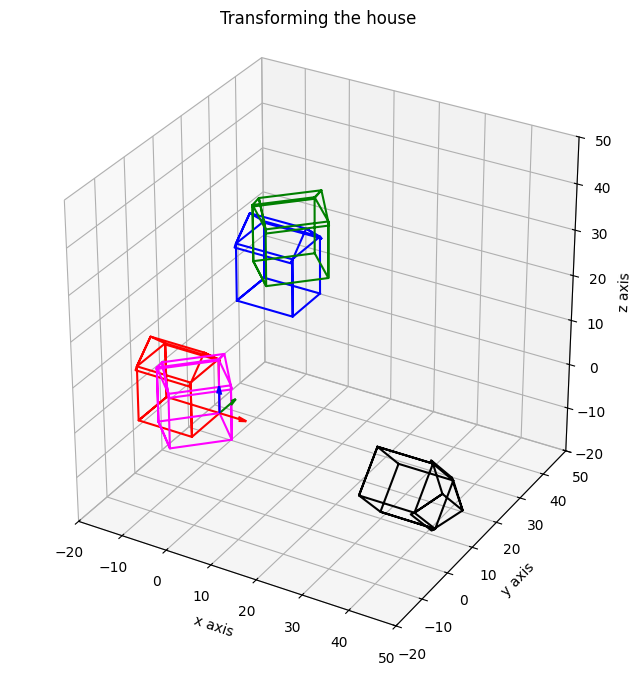

In [11]:
#Translate the house with dx=20, dy=4, dz=30
T = move (20,4,30)
print('Translation Matrix: \n',T)
new_house = np.dot(T,house)


# Let's create a new figure with the original house and the world reference frame
ax0 = set_plot(lim=[-20,50])
ax0 = draw_arrows(world[:,-1],world[:,0:3],ax0,6)
#plot original house in red
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
ax0.set_aspect('equal')
ax0.set_title('Transforming the house')

# Now plot the translated house in blue, in the same figure so you can see what happened
ax0.plot3D(new_house[0,:],new_house[1,:],new_house[2,:], 'blue')

# Rotate the ORIGINAL house along the z-axis by 45 degrees
Rz = z_rotation(45)
print('Rotation Matrix: \n',Rz)
new_house2 = np.dot(Rz,house)


# Now plot the rotated house in magenta, in the same figure

ax0.plot3D(new_house2[0,:],new_house2[1,:],new_house2[2,:], 'magenta')

# Rotate the TRANSLATED house along the z-axis by 45 degrees
Rz = z_rotation(45)
new_house3 = np.dot(Rz,new_house)

# Now plot the rotated house in green, in the same figure
ax0.plot3D(new_house3[0,:],new_house3[1,:],new_house3[2,:], 'green')


# Now rotate the latest house along the y-axis by 90 degrees
Ry = y_rotation(90)
print('Rotation Matrix: \n',Ry)
new_house4 = np.dot(Ry,new_house3)

# Now plot the new house in black, in the same figure
ax0.plot3D(new_house4[0,:],new_house4[1,:],new_house4[2,:], 'black')



# Attention
### We could also combine all the transforamtions first and then apply to the house

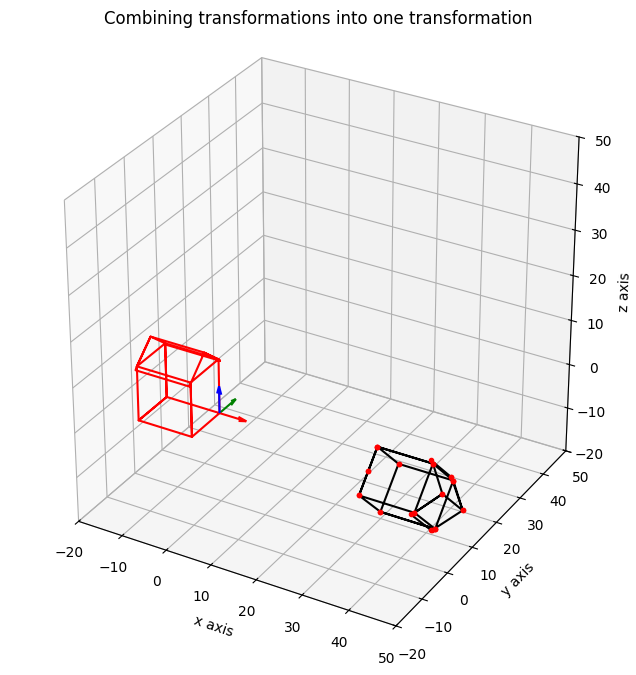

In [12]:
M1 = Ry@Rz@T
new_house5 = M1@house

# Let's create a new figure with the original house and the world reference frame
ax0 = set_plot(lim=[-20,50])
ax0 = draw_arrows(world[:,-1],world[:,0:3],ax0,6)
#plot original house in red
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
ax0.set_aspect('equal')
ax0.set_title('Combining transformations into one transformation')

ax0.plot3D(new_house4[0,:],new_house4[1,:],new_house4[2,:], 'black')
ax0.plot3D(new_house5[0,:],new_house5[1,:],new_house5[2,:], '.r')

### The order of the transformations matters!!!!!

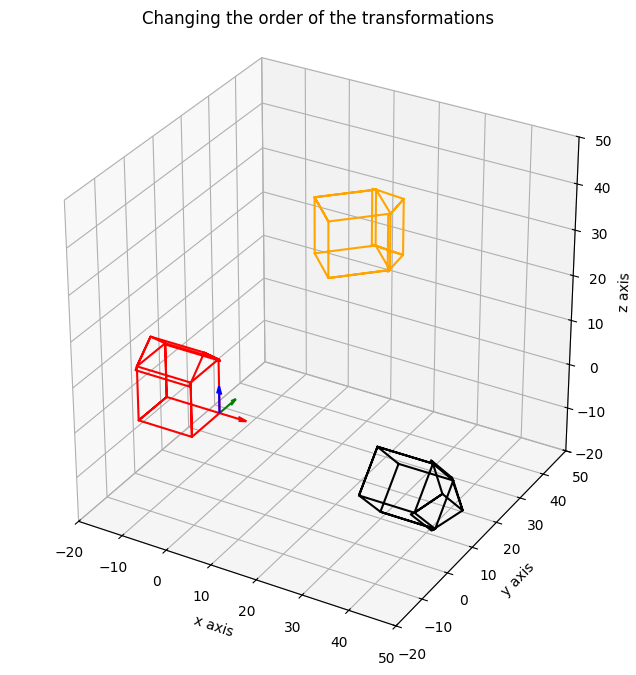

In [13]:
M2 = Rz@T@Ry
new_house6 = M2@house
# Let's create a new figure with the original house and the world reference frame
ax0 = set_plot(lim=[-20,50])
ax0 = draw_arrows(world[:,-1],world[:,0:3],ax0,6)
#plot original house in red
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
ax0.set_aspect('equal')

ax0.plot3D(new_house4[0,:],new_house4[1,:],new_house4[2,:], 'black')
ax0.plot3D(new_house6[0,:],new_house6[1,:],new_house6[2,:], 'orange')
ax0.set_title('Changing the order of the transformations')

plt.show()